In [1]:
from datetime import date
from nsepy import get_history
infy = get_history(symbol='INFY',
                   start=date(2015,1,1),
                   end=date(2015,12,31))

tcs = get_history(symbol='TCS',
                   start=date(2015,1,1),
                   end=date(2015,12,31))

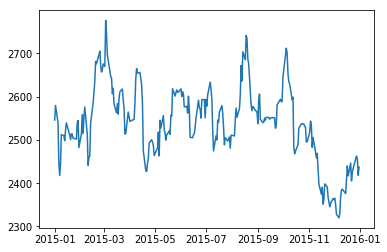

In [3]:
import matplotlib as plt
import matplotlib
import datetime as db
import matplotlib.pyplot as plt
from datetime import date, timedelta
from pandas import  Series
print(plt.plot(tcs['Close']))

In [4]:
def start(close,time=1): #time in weeks
    day = 7*time
    i=0
    j=0
    for i in range(len(close)):
        j = (close.index[i]-close.index[0]).days+1
        if j>day:
            break
    return i-1

In [5]:
def net(array,start,steps):
    i=0
    value =0
    for i in range(start-steps,start):
        value += array[i]
    
    return value

In [6]:
def colr(week):
    if week%12 ==0 : return 'r'
    if (week+4)%12 ==0 : return 'g'
    if (week+8)%12 ==0: return 'b'

In [7]:
import numpy as np;
def MA(close,week): 
    length = len(close)
    m=0
    out={}
    plot = {}
    
    for m in range(len(week)):
        ind = []
        value = []
        i = 0
        j = start(close,week[m])
        
        for i in range(j): 
            value.append(None)
            ind.append(close.index[i])
        
        k=0
        i=j
        
        for i in range(j,length):
            k= start(close[:i],week[m])
            ind.append(close.index[i])
            value.append(net(close,i,k)/k)
            k=0
        
        out[str((4*m+4))+'MA'] =[value,ind]
        col = week[m]
        #plot values
        plot[str((4*m+4))+'MA'] = plt.plot(out[str((4*m+4))+'MA'][1],out[str((4*m+4))+'MA'][0],color =colr(col))
    
    return out, plot

In [8]:
def stock(symbol,start_date,end_date):
    arr={}
    out = {}
    plot ={}
    i = 0
    sym = len(symbol)
    
    for i in range(sym):
        arr['str(symbol[i])'] = get_history(symbol= symbol[i],start=start_date,end=end_date)
        weeks = range(4,52,4)
        out[str(symbol[i])],plot[str(symbol[i])] = MA(arr['str(symbol[i])']['Close'],weeks)
    return out,plot

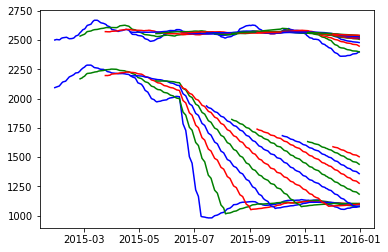

In [11]:
out,plot = stock(['TCS','INFY'],date(2015,1,1),date(2015,12,31))

In [12]:
print(plot['INFY']['4MA'])